<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Regressor(LDR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install firebase-admin
import firebase_admin
import cv2 
import math
import numpy as np 
from google.colab.patches import cv2_imshow

In [0]:
from firebase_admin import credentials, storage,db 
import pickle

In [0]:
cred = credentials.Certificate('/content/credentials_new.json')

##  only take the part from where the actual name starts
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'location-5f194.appspot.com',
}, name='storage')

In [5]:
s7_hdr=[]
note4_hdr=[]
minote_hdr=[]
PatelNagarMi_hdr=[]
gurgaonNote4_hdr=[]

bucket = storage.bucket(app = app)
blobs = bucket.list_blobs()
ctr=0


## Reading all the LDR images 
for blob in blobs:
  if('s7' in blob.name and 'hdr' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "s7_hdr" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "s7_hdr" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      s7_hdr.append(l) 
      print(name)
  if('note4' in blob.name and 'hdr' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "note4_hdr" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "note4_hdr" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      note4_hdr.append(l)
      print(name)
  if('minote' in blob.name and 'hdr' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "minote_hdr" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "minote_hdr" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      minote_hdr.append(l)
      print(name)
  if('PatelNagarMi' in blob.name and 'hdr' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "PatelNagarMi" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "PatelNagarMi" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      PatelNagarMi_hdr.append(l)
      print(name)
  if('gurgaonNote4' in blob.name and 'hdr' in blob.name and int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5):
      blob.download_to_filename('/content/' + "gurgaonNote4" + str(blob.name.split('/')[-1])+ '.jpeg')
      name = "gurgaonNote4" + str(blob.name.split('/')[-1])+ '.jpeg' 
      ctr+=1
      im = cv2.imread(name)
      im = cv2.resize(im,(256,256))
      l=[]
      l.append(name)
      l.append(im)
      gurgaonNote4_hdr.append(l)
      print(name)

PatelNagarMi2019-08-10 10:43:09.jpeg
PatelNagarMi2019-08-10 10:48:14.jpeg
PatelNagarMi2019-08-10 10:53:28.jpeg
PatelNagarMi2019-08-10 10:57:32.jpeg
PatelNagarMi2019-08-10 11:03:02.jpeg
PatelNagarMi2019-08-10 11:07:49.jpeg
PatelNagarMi2019-08-10 11:18:27.jpeg
PatelNagarMi2019-08-10 11:22:51.jpeg
PatelNagarMi2019-08-10 11:27:25.jpeg
PatelNagarMi2019-08-10 11:32:24.jpeg
PatelNagarMi2019-08-10 11:37:49.jpeg
PatelNagarMi2019-08-10 11:42:24.jpeg
PatelNagarMi2019-08-10 11:49:31.jpeg
PatelNagarMi2019-08-10 11:53:00.jpeg
PatelNagarMi2019-08-10 11:57:22.jpeg
PatelNagarMi2019-08-10 12:02:47.jpeg
PatelNagarMi2019-08-10 12:07:50.jpeg
PatelNagarMi2019-08-10 12:12:26.jpeg
PatelNagarMi2019-08-10 12:18:42.jpeg
PatelNagarMi2019-08-10 12:22:26.jpeg
PatelNagarMi2019-08-10 12:27:31.jpeg
PatelNagarMi2019-08-10 12:35:25.jpeg
PatelNagarMi2019-08-10 12:37:28.jpeg
PatelNagarMi2019-08-10 12:44:02.jpeg
PatelNagarMi2019-08-10 12:48:27.jpeg
PatelNagarMi2019-08-10 12:52:49.jpeg
PatelNagarMi2019-08-10 13:00:31.jpeg
P

In [7]:
print(len(note4_hdr))
print(len(s7_hdr))
print(len(gurgaonNote4_hdr))
print(len(PatelNagarMi_hdr))
print(len(minote_hdr))

38
84
170
531
98


In [0]:
with open('/content/labels_prevhour.bin','rb') as file:
  data = pickle.load(file)
  

In [9]:
print(data)

{'s7_hdr': [['2019-07-28 15:35:33.jpeg', 64, 29], ['2019-07-28 16:04:07.jpeg', 75, 61], ['2019-07-28 16:04:23.jpeg', 75, 61], ['2019-07-28 16:05:31.jpeg', 75, 61], ['2019-07-28 16:38:41.jpeg', 81, 66], ['2019-07-28 16:38:52.jpeg', 81, 66], ['2019-07-28 16:39:31.jpeg', 81, 66], ['2019-07-29 11:49:24.jpeg', 38, 38], ['2019-07-29 11:49:25.jpeg', 38, 38], ['2019-07-29 11:50:38.jpeg', 38, 38], ['2019-07-29 12:23:33.jpeg', 44, 38], ['2019-07-29 12:53:55.jpeg', 64, 41], ['2019-07-29 12:55:27.jpeg', 50, 38], ['2019-07-29 12:55:48.jpeg', 47, 38], ['2019-07-29 13:15:38.jpeg', 38, 135], ['2019-07-29 13:16:22.jpeg', 35, 35], ['2019-07-29 13:16:40.jpeg', 32, 35], ['2019-07-29 13:24:37.jpeg', 38, 44], ['2019-07-29 13:29:44.jpeg', 29, 32], ['2019-07-29 13:42:15.jpeg', 47, 41], ['2019-07-29 13:55:53.jpeg', 35, 47], ['2019-07-29 13:55:54.jpeg', 35, 47], ['2019-07-29 14:00:53.jpeg', 41, 35], ['2019-07-29 14:01:15.jpeg', 44, 35], ['2019-07-29 14:14:22.jpeg', 64, 38], ['2019-07-29 14:14:23.jpeg', 64, 38],

In [10]:
print(data.keys())

dict_keys(['s7_hdr', 's7_jpeg', 'note4_hdr', 'note4_jpeg', 'minote_hdr', 'minote_jpeg', 'PatelNagarMi_hdr', 'PatelNagarMi_jpeg', 'gurgaonNote4_hdr', 'gurgaonNote4_jpeg'])


In [0]:
l_s7_hdr=[]
l_note4_hdr=[]
l_minote_hdr=[]
l_PatelNagarMi_hdr=[]
l_gurgaonNote4_hdr=[]

l_s7_hdr=data['s7_hdr']
l_note4_hdr=data['note4_hdr']
l_minote_hdr= data['minote_hdr']
l_PatelNagarMi_hdr=data['PatelNagarMi_hdr']
l_gurgaonNote4_hdr=data['gurgaonNote4_hdr']


In [20]:
feat=[]
ctr=0
for img in s7_hdr:
  for l  in l_s7_hdr:
    if(img[0][6:] == l[0]):
      print('s7')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      t.append(l[2])
      feat.append(t) 

      
for img in note4_hdr:
  for l  in l_note4_hdr:
    if(img[0][9:] == l[0]):
      print('note4')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      t.append(l[2])
      feat.append(t) 
    
      
for img in minote_hdr:
  #print(img[0])
  for l  in l_minote_hdr:
    #print(l[0])
    if(img[0][10:] == l[0]):
      print('minote')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      t.append(l[2])
      feat.append(t) 
  

for img in PatelNagarMi_hdr:
  #print(img[0])
  for l  in l_PatelNagarMi_hdr:
    #print(l[0])
    if(img[0][12:] == l[0]):
      print('PatelNagar')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      t.append(l[2])
      feat.append(t) 
    
for img in gurgaonNote4_hdr:
  for l  in l_gurgaonNote4_hdr:
    if(img[0][12:] == l[0]):
      print('Gurgaon')
      t=[]
      im = img[1]
      t.append(l[0])
      t.append(entropy(im))
      t.append(contrast(im))
      t.append(trans_deg(img[1]))
      t.append(l[1])
      t.append(l[2])
      feat.append(t) 



s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
s7
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
note4
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
minote
mi

In [21]:
for val in feat:
  print(val[1])
  print('\t')
  print(val[2])
  print('\t')
  print(val[3])

37.22678756713867
	
68.88191754275347
	
2
47.065059661865234
	
62.23692343120335
	
2
53.23287582397461
	
67.0993693452088
	
2
53.76498031616211
	
66.73995429495821
	
1
43.83427810668945
	
70.27018565185803
	
1
46.913997650146484
	
60.21520043288193
	
1
45.037010192871094
	
77.7040221415209
	
1
39.126556396484375
	
56.61344348303906
	
2
37.33599090576172
	
70.44397925839516
	
1
41.33512878417969
	
59.23516075411799
	
2
47.936737060546875
	
73.38764829963526
	
2
45.23759078979492
	
82.70619020244611
	
1
44.692543029785156
	
44.481475070451474
	
2
44.46748352050781
	
69.70346879937786
	
2
36.37445831298828
	
56.44920850308993
	
2
7.6959662437438965
	
92.1436599885081
	
3
46.848751068115234
	
79.25935577910546
	
1
50.561492919921875
	
76.26393896137175
	
2
42.828060150146484
	
88.57888761087207
	
1
43.97500228881836
	
54.367832321439
	
2
47.35652542114258
	
61.07956804147241
	
2
23.15976905822754
	
93.25765118413118
	
2
30.86890411376953
	
86.38911443008516
	
2
38.06597900390625
	
57.23801

In [22]:
cred = credentials.Certificate('/content/credentials_weather.json')

# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://celestini-bd493.firebaseio.com/'
})

In [0]:
    
ref = db.reference()
df = ref.get()


In [24]:
temp_weather = {}

for key in df:
  try:
    l=[]
    l.append(df[key]['main']['humidity'])
    l.append(df[key]['main']['pressure'])
    l.append(df[key]['main']['temp'])
    l.append(df[key]['visibility'])
    l.append(df[key]['wind']['deg'])
    l.append(df[key]['wind']['speed'])
    l.append(df[key]['clouds']['all'])
    k = df[key]['weather'][0]['description']
    if(k=='haze'):
      l.append(0)
    elif(k=='mist'):
      l.append(1)
    elif(k=='drizzle'):
      l.append(2)
    elif(k=='dust'):
      l.append(3)
    temp_weather[key]=l
  except:
    print(key)
    

02-08-2019 24:49:49
02-08-2019 24:54:49
07-08-2019 07:57:31
07-08-2019 08:02:31
07-08-2019 08:07:31
07-08-2019 08:12:31
07-08-2019 08:17:31
07-08-2019 08:22:31
07-08-2019 08:27:31
07-08-2019 08:32:31
07-08-2019 08:37:31
07-08-2019 08:42:31
07-08-2019 08:47:31
07-08-2019 08:57:00
09-08-2019 05:41:06
09-08-2019 05:46:06
09-08-2019 05:51:06
09-08-2019 05:56:06
09-08-2019 06:01:06
09-08-2019 06:06:06
09-08-2019 06:11:06
09-08-2019 06:16:06
09-08-2019 06:21:06
09-08-2019 06:26:06
09-08-2019 06:31:06
10-08-2019 02:30:04
10-08-2019 02:35:04
10-08-2019 02:40:04
10-08-2019 02:45:04
10-08-2019 02:50:04
10-08-2019 02:55:04
16-08-2019 09:22:15
16-08-2019 09:27:15
16-08-2019 09:32:15
16-08-2019 09:37:15
16-08-2019 09:42:15
16-08-2019 09:47:15
16-08-2019 09:52:15
17-08-2019 05:15:15
17-08-2019 05:20:15
17-08-2019 05:25:15
25-07-2019 02:44:11
25-07-2019 02:49:11
25-07-2019 02:54:11
25-07-2019 02:59:11
25-07-2019 03:04:11
25-07-2019 03:09:11
25-07-2019 03:14:11
25-07-2019 03:19:11
25-07-2019 03:24:11


In [0]:
feat_a=[]
for val in feat:
  #print(val[0])
  temp = val[0] 
  #print(temp)
  temp=temp.split('-')
  #print(temp)
  newtemp=temp[2].split(' ')
  #print(newtemp)
  newesttemp=newtemp[1].split(':')
  #print(newesttemp)
  j=int(newesttemp[1])
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l=[]
  l.append(final)
  l.append(val[1])
  l.append(val[2])
  l.append(val[3])
  l.append(val[4])
  l.append(val[5])
  feat_a.append(l)


In [31]:
print(feat_a)

[['28-07-2019 15:30', 37.22678756713867, 68.88191754275347, 2, 64, 29], ['28-07-2019 16:00', 47.065059661865234, 62.23692343120335, 2, 75, 61], ['28-07-2019 16:00', 53.23287582397461, 67.0993693452088, 2, 75, 61], ['28-07-2019 16:00', 53.76498031616211, 66.73995429495821, 1, 75, 61], ['28-07-2019 16:45', 43.83427810668945, 70.27018565185803, 1, 81, 66], ['28-07-2019 16:45', 46.913997650146484, 60.21520043288193, 1, 81, 66], ['28-07-2019 16:45', 45.037010192871094, 77.7040221415209, 1, 81, 66], ['29-07-2019 11:45', 39.126556396484375, 56.61344348303906, 2, 38, 38], ['29-07-2019 11:45', 37.33599090576172, 70.44397925839516, 1, 38, 38], ['29-07-2019 11:45', 41.33512878417969, 59.23516075411799, 2, 38, 38], ['29-07-2019 12:30', 47.936737060546875, 73.38764829963526, 2, 44, 38], ['29-07-2019 12:00', 45.23759078979492, 82.70619020244611, 1, 64, 41], ['29-07-2019 12:00', 44.692543029785156, 44.481475070451474, 2, 50, 38], ['29-07-2019 12:00', 44.46748352050781, 69.70346879937786, 2, 47, 38], 

In [0]:
weather={}
for key in temp_weather:
  temp=key.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  if(j<=7.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  if(final not in weather):
    weather[final]=temp_weather[key]
 


In [33]:
print(len(weather))

2363


In [34]:
print(feat_a)

[['28-07-2019 15:30', 37.22678756713867, 68.88191754275347, 2, 64, 29], ['28-07-2019 16:00', 47.065059661865234, 62.23692343120335, 2, 75, 61], ['28-07-2019 16:00', 53.23287582397461, 67.0993693452088, 2, 75, 61], ['28-07-2019 16:00', 53.76498031616211, 66.73995429495821, 1, 75, 61], ['28-07-2019 16:45', 43.83427810668945, 70.27018565185803, 1, 81, 66], ['28-07-2019 16:45', 46.913997650146484, 60.21520043288193, 1, 81, 66], ['28-07-2019 16:45', 45.037010192871094, 77.7040221415209, 1, 81, 66], ['29-07-2019 11:45', 39.126556396484375, 56.61344348303906, 2, 38, 38], ['29-07-2019 11:45', 37.33599090576172, 70.44397925839516, 1, 38, 38], ['29-07-2019 11:45', 41.33512878417969, 59.23516075411799, 2, 38, 38], ['29-07-2019 12:30', 47.936737060546875, 73.38764829963526, 2, 44, 38], ['29-07-2019 12:00', 45.23759078979492, 82.70619020244611, 1, 64, 41], ['29-07-2019 12:00', 44.692543029785156, 44.481475070451474, 2, 50, 38], ['29-07-2019 12:00', 44.46748352050781, 69.70346879937786, 2, 47, 38], 

In [0]:
trans=[]
cont=[]
ent=[]
hours=[]
hum=[]
pressure=[]
tempr=[]
deg=[]
speed=[]
prev=[]

pm=[]

## COMBINING 1ST 4 LOCATIONS DATA 
for e in feat_a:
  for w in weather:
    if(e[0] == w):
      hours.append(float(e[0][-5:-3]))
      pm.append(float(e[4]))
      prev.append(float(e[5]))
      trans.append(e[3])
      ent.append(float(e[1]))
      cont.append(float(e[2]))
      hum.append(float(weather[w][0]))
      pressure.append(float(weather[w][1]))
      tempr.append(float(weather[w][2])) 
      deg.append(float(weather[w][4]))
      speed.append(float(weather[w][5]))
      

In [37]:
print(len(trans))
print(len(hours))
print(len(cont))
print(len(ent))
print(len(hum))
print(len(pressure))
print(len(tempr))
print(len(deg))
print(len(speed))
print(len(pm))
print(len(prev))

489
489
489
489
489
489
489
489
489
489
489


In [38]:
print(trans)
print(hours)
print(cont)
print(ent)
print(hum)
print(pressure)
print(tempr)
print(deg)
print(speed)
print(pm)
print(prev)

[2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 

Features And Labels 

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor

In [0]:
final_shape=len(hours)

#FEATURES 


trans= np.reshape(trans,(final_shape,1))
hours = np.reshape(hours,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
hum = np.reshape(hum,(final_shape,1))
pressure = np.reshape(pressure,(final_shape,1))
tempr = np.reshape(tempr,(final_shape,1))
deg = np.reshape(deg,(final_shape,1))
speed = np.reshape(speed,(final_shape,1))
prev = np.reshape(prev,(final_shape,1))

#LABELS
pm = np.reshape(pm,(final_shape,1))


# SCALING 

s1 = MinMaxScaler()
hours = s1.fit_transform(hours)
s2 = MinMaxScaler()
cont = s2.fit_transform(cont)
s3 = MinMaxScaler()
ent = s3.fit_transform(ent)
s4 = MinMaxScaler()
hum = s4.fit_transform(hum)
s5 = MinMaxScaler()
pressure = s5.fit_transform(pressure)
s6 = MinMaxScaler()
tempr = s6.fit_transform(tempr)
s7 = MinMaxScaler()
deg = s7.fit_transform(deg)
s8 = MinMaxScaler()
speed = s8.fit_transform(speed)
s9 = MinMaxScaler()
prev = s9.fit_transform(prev)


features = np.hstack((hours,cont, ent, hum, pressure, tempr, deg, speed,prev))




In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size=0.3, random_state = 42)
reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)


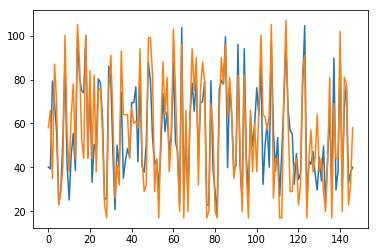

In [54]:
plt.plot(pred)
plt.plot(y_test)

In [55]:
print(mean_squared_error(y_test,pred)**0.5)

14.155055964253867


In [56]:
for i in range(len(pred)):
  print(str(y_test[i]) + '\t' + str(pred[i]))

[58.]	[40.18596321]
[66.]	[39.2988426]
[35.]	[79.31688853]
[87.]	[69.36294307]
[69.]	[56.03347203]
[23.]	[23.07685452]
[29.]	[29.59963254]
[41.]	[53.14481737]
[100.]	[88.41460957]
[56.]	[41.55959773]
[38.]	[25.14537123]
[64.]	[45.71472925]
[78.]	[55.48141017]
[44.]	[38.59328499]
[105.]	[100.95606555]
[87.]	[80.94181961]
[53.]	[74.96648503]
[44.]	[73.88252992]
[100.]	[100.02933829]
[44.]	[44.855155]
[84.]	[79.22436283]
[44.]	[33.22485327]
[82.]	[50.51487543]
[38.]	[46.90500583]
[75.]	[80.29041582]
[76.]	[78.56146885]
[56.]	[61.99877892]
[23.]	[25.56911824]
[17.]	[25.7250921]
[76.]	[86.04312189]
[91.]	[80.13346623]
[63.]	[46.23315973]
[26.]	[20.69460102]
[41.]	[50.16361569]
[32.]	[39.77294019]
[93.]	[74.18852128]
[64.]	[35.06868962]
[64.]	[42.95575938]
[64.]	[48.56655404]
[44.]	[44.71260586]
[67.]	[69.49041039]
[60.]	[69.49488516]
[61.]	[76.6574242]
[58.]	[42.5322594]
[94.]	[82.39588601]
[44.]	[40.39506482]
[29.]	[37.78449414]
[32.]	[50.6972712]
[99.]	[87.86319481]
[99.]	[79.68284808]
[8

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


14.155055964253867


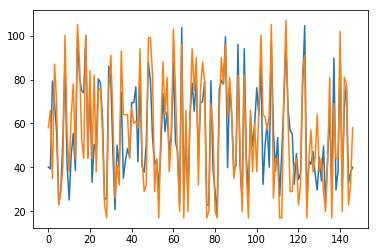

In [57]:
random_reg = RandomForestRegressor()
random_reg.fit(x_train, y_train)
predr = random_reg.predict(x_test)
plt.plot(pred)
plt.plot(y_test)
print(mean_squared_error(y_test,pred)**0.5)

In [48]:
for i in range(len(predr)):
  print(str(y_test[i]) + '\t' + str(predr[i]) )

[58.]	51.0
[66.]	59.2
[35.]	34.0
[87.]	84.1
[69.]	81.6
[23.]	24.2
[29.]	44.0
[41.]	59.4
[100.]	93.0
[56.]	58.0
[38.]	27.5
[64.]	63.4
[78.]	76.3
[44.]	78.0
[105.]	105.1
[87.]	89.7
[53.]	37.6
[44.]	29.0
[100.]	97.9
[44.]	71.1
[84.]	69.3
[44.]	49.9
[82.]	74.8
[38.]	39.2
[75.]	78.7
[76.]	64.4
[56.]	52.6
[23.]	21.8
[17.]	17.0
[76.]	73.5
[91.]	83.0
[63.]	55.4
[26.]	28.7
[41.]	37.1
[32.]	32.0
[93.]	64.1
[64.]	46.8
[64.]	43.5
[64.]	59.7
[44.]	19.1
[67.]	59.8
[60.]	66.8
[61.]	51.0
[58.]	51.5
[94.]	92.1
[44.]	36.5
[29.]	55.3
[32.]	44.2
[99.]	87.7
[99.]	94.4
[82.]	74.8
[29.]	43.1
[44.]	38.9
[17.]	26.6
[56.]	43.4
[88.]	75.5
[64.]	58.9
[81.]	80.6
[38.]	34.7
[53.]	55.9
[103.]	92.8
[76.]	74.8
[44.]	41.6
[20.]	24.2
[96.]	79.5
[17.]	17.6
[66.]	64.7
[20.]	54.6
[64.]	66.0
[94.]	94.7
[75.]	60.7
[90.]	85.3
[32.]	36.9
[75.]	85.0
[88.]	85.9
[79.]	75.8
[17.]	18.2
[20.]	24.2
[69.]	71.7
[58.]	58.0
[20.]	32.6
[17.]	17.3
[66.]	66.2
[90.]	95.2
[78.]	77.5
[96.]	97.7
[63.]	60.5
[81.]	73.8
[64.]	72.5
[35.]	38.3
[44.]

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
    
  return (-1 * ent[0])

In [0]:
def trans_deg(im):
#   im = cv2.imread(img)
#   im = cv2.resize(im, (256,256))
  B=np.zeros((256,256))
  D=np.zeros((256,256))
  C=np.zeros((256,256))
  # 3rd channel or im[2] has been split as b,g,r 

  b,g,r = cv2.split(im)

  for i in range(b.shape[0]):
    for j in range(b.shape[1]):
      D[i][j] = min(b[i][j], g[i][j], r[i][j])
      B[i][j] = max(b[i][j], g[i][j], r[i][j])
      C[i][j] = B[i][j] - D[i][j]

  d = np.sum(D)/float(np.size(D))
  b = np.sum(B)/float(np.size(B))
  c = b-d 
  A = (0.33)*max(np.ndarray.flatten(B)) + (0.66)*b
  
  x1=((A - d)/float(A)) 
  x2=(c/float(A))
  u = 10.127489
  v= -8.336512
  s = 0.13606234
  
  w = math.exp(-0.5*(u*x1 + v*x2)+s)
  
  if(w<=0.1):
      w=0
  elif(w<=0.3):
    w=1
  elif(w<=0.5):
    w=2
  elif(w<=0.7):
    w=3
  elif(w<=0.8):
    w=4
  elif(w<=0.9):
    w=5
    
  return w